# Mathematik für Biologiestudierende

Wintersemester 2025/26

14.01.2026

&copy; 2026 Prof. Dr. Rüdiger W. Braun 

# Wiederholung (interaktiv)

Gehen Sie auf die Website

* https://pingo.coactum.de

und geben Sie folgende Zugangsnummer ein

* **670719**

oder scannen Sie den QR-Code

![QR-Code](bilder/qr02.png)

# Themen heute

* Welch-Test

In [1]:
import numpy as np
np.set_printoptions(legacy='1.21')
import seaborn as sns
sns.set_theme()
sns.set_context('talk')
import pandas as pd
from scipy import stats

# Posthoc-Analyse beim Alexander-Govern-Test

* ANOVA kann nur im homoskedastischen Fall angewandt werden
* homoskedastisch bedeutet, dass alle Gruppen dieselbe Varianz haben

* im heteroskedastischen Fall wird der Alexander-Govern-Test verwendet

* zur Posthoc-Analyse kann dann nicht der klassische t-Test verwendet werden

# Der Welch-Test

* Der t-Test kann nur gerechnet werden, wenn die Varianzen der zu vergleichenden Datensätze übereinstimmen
* Im heteroskedastischen Fall ist das nicht der Fall
* Man rechnet dann einen Welch-Test
* Der Welch-Test wird auch als "t-Test für ungleiche Varianzen" bezeichnet

* In scipy ist der Welch-Test wie folgt implementiert

* `stats.ttest_ind(x, y, equal_var=False)`

#### Beispiel Barsche

In [3]:
barsche = pd.read_csv('barsche.csv')
barsche.head()

,Art,Länge
0,gestreift,9.890006
1,gestreift,9.343944
2,gestreift,9.867069
3,gestreift,10.302781
4,gestreift,10.066964


In [4]:
ds = barsche[barsche.Art=='gestreift'].Länge
dl = barsche[barsche.Art=='gefleckt'].Länge
db = barsche[barsche.Art=='blau'].Länge
dr = barsche[barsche.Art=='braun'].Länge

In [5]:
stats.ttest_ind(db, dr, equal_var=False)

TtestResult(statistic=9.647287139857793, pvalue=1.2289650206522807e-13, df=57.645418945809595)

* `equal_var=True`: dann wird ein unverbundener t-Test gerechnet
* `equal_var=False`: dann wird ein Welch-Test gerechnet

* Standardeinstellung ist `equal_var=True`

* bei der Posthoc-Analyse wird immer ein zweiseitiger Test gerechnet

* man kann den Welch-Test aber auch wie den t-Test einsetzen, wenn die Gleichheit der Varianzen nicht gesichert ist
* dann sind auch `alternative=greater` und `alternative=less` möglich

### Vergleich von *t*-Test und Welch-Test

* Wenn die Varianzen beider Datensätze gleich sind, dann kann sowohl der $t$-Test als auch der Welch-Test gerechnet werden
* Die Ergebnisse sind dann ähnlich

* Wir vergleichen blaue (`db`) und braune (`dr`) Barsche

In [8]:
db.var()

0.21532008593268628

In [9]:
dr.var()

0.18400176708645483

Diese beiden Arten besitzen (annähernd) gleiche Varianz

In [16]:
stats.ttest_ind(db, dr)    #   t-Test

TtestResult(statistic=9.647287139857793, pvalue=1.154425306617111e-13, df=58.0)

In [17]:
stats.ttest_ind(db, dr, equal_var=False)    #  Welch-Test

TtestResult(statistic=9.647287139857793, pvalue=1.2289650206522807e-13, df=57.645418945809595)

In [18]:
from statsmodels.sandbox.stats.multicomp import MultiComparison

In [19]:
muc = MultiComparison(barsche.Länge, barsche.Art)

* `muc.allpairtest(stats.ttest_ind)` würde einen t-Test rechnen
* wir können den Schalter `equal_var=False` nicht ohne weiteres übergeben

* wir werden uns ein winziges Programm schreiben

# Python-Funktionen

In [9]:
def quadrat(x):
    return x*x

In [12]:
quadrat(5)

25

* `def`  definiert eine Funktion
* die Rechnungen, aus welchen die Funktion besteht, werden eingerückt
* der auf `return` folgende Wert ist das Funktionsergebnis

# Post-hoc Analyse des Alexander-Govern-Tests

In [20]:
def welch_test(a, b):
    return stats.ttest_ind(a, b, equal_var=False)

In [21]:
res = muc.allpairtest(welch_test)[0]
res

group1,group2,stat,pval,pval_corr,reject
blau,braun,9.6473,0.0,0.0,True
blau,gefleckt,5.8735,0.0,0.0,True
blau,gestreift,18.752,0.0,0.0,True
braun,gefleckt,0.7068,0.484,1.0,False
braun,gestreift,8.4956,0.0,0.0,True
gefleckt,gestreift,3.3453,0.002,0.012,True


# Normalverteilungsannahmen

* Sowohl `f_oneway` als auch `alexandergovern` liefern nur für normalverteilte Daten richtige Ergebnisse
* Normalverteilungsannahmen prüfen wir mit dem Q-Q-Plot

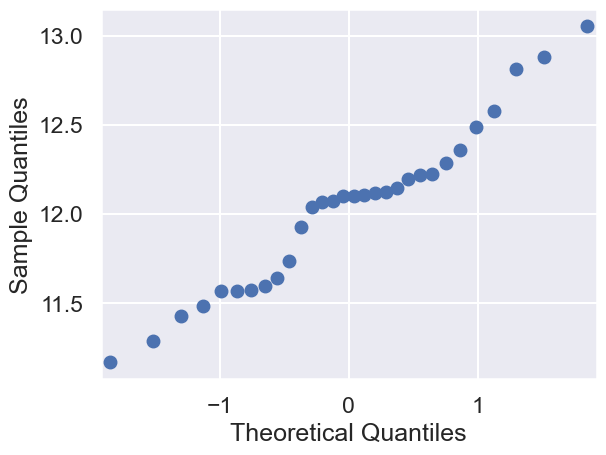

In [22]:
import statsmodels.api as sm
pp = sm.ProbPlot(db)
pp.qqplot();

ausreichende Übereinstimmung

#### Beispiel Libellen

Flügellängen von Libellen in *mm* (erfundene Daten)

In [24]:
libellen = pd.read_csv('libellen.csv')
libellen.head()

,Art,Länge
0,graue,4.908840
1,graue,5.016692
2,graue,4.382700
3,graue,4.847548
4,graue,5.523503


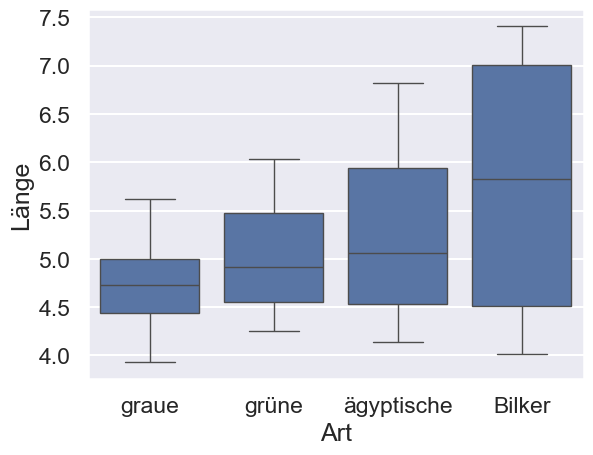

In [25]:
sns.boxplot(libellen, x="Art", y="Länge");

In [26]:
dg = libellen[libellen.Art=='graue'].Länge
du = libellen[libellen.Art=='grüne'].Länge
da = libellen[libellen.Art=='ägyptische'].Länge
dB = libellen[libellen.Art=='Bilker'].Länge

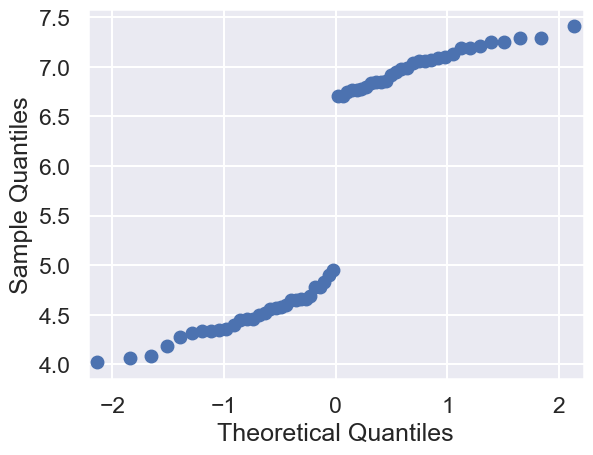

In [27]:
pp = sm.ProbPlot(dB)
pp.qqplot();

nicht normalverteilt

# Kruskal-Wallis-Test

* im Fall nicht normalverteilter Daten rechnet man den Kruskal-Wallis-Test
* dann ist es auch gleichgültig, ob die Daten heteroskedastisch sind

In [28]:
stats.kruskal(dg, du, da, dB)

KruskalResult(statistic=16.028153526970982, pvalue=0.0011190121329907562)

# Post-hoc Analyse

Das nicht-parametrische Analogon zum unverbundenen t-Test ist der Mann-Whitney-Test

In [29]:
muc = MultiComparison(libellen.Länge, libellen.Art)

In [30]:
res = muc.allpairtest(stats.mannwhitneyu, method='holm')
res[0]

group1,group2,stat,pval,pval_corr,reject
Bilker,graue,2360.0,0.0033,0.0199,True
Bilker,grüne,2167.0,0.0544,0.1088,False
Bilker,ägyptische,2217.0,0.0288,0.0864,False
graue,grüne,1260.0,0.0046,0.0228,True
graue,ägyptische,1259.0,0.0046,0.0228,True
grüne,ägyptische,1561.0,0.2106,0.2106,False


# Gruppenvergleiche

Übersicht

|Verteilungsannahmen               | Test in `scipy.stats` | Post-hoc-Test        | in `scipy.stats`               |
|:---------------------------------|:----------------------|:---------------------|:-------------------------------|
|normalverteilt, homoskedastisch   | `f_oneway`            | unverbundener t-Test |`ttest_ind`                     |
|normalverteilt, heteroskedastisch | `alexandergovern`     | Welch-Test           |`ttest_ind` mit`equal_var=False`|
|nicht normalverteilt              | `kruskal`             | Mann-Whitney-Test    | `mannwhitneyu`                 |

| Test                 | Art               |
|:---------------------|:------------------|
|t-Test                |parametrisch       |
|Welch-Test            |parametrisch       |
|Mann-Whitney-Test     |nichtparametrisch  |
|ANOVA                 |parametrisch       |
|Alexander-Govern-Test |parametrisch       |
|Kruskal-Wallis-Test   |nichtparametrisch  |

* die parametrischen Tests vergleichen Mittelwerte
* die nichtparametrischen Tests vergleichen Mediane